# Loading libraries

In [10]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(repr)
options(repr.plot.width=10, repr.plot.height=8)

# Loading Data

In [2]:
url_NYPD <- "https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD"
NYPD <- read.csv(url_NYPD)

# EDA

Let us start with simple EDA

In [3]:
head(NYPD, 10)

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,⋯,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lon_Lat
,<int>,<chr>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,228798151,05/27/2021,21:30:00,QUEENS,,105,0,,,false,⋯,,,18-24,M,BLACK,1058925,180924.0,40.66296,-73.73084,POINT (-73.73083868899994 40.662964620000025)
2,137471050,06/27/2014,17:40:00,BRONX,,40,0,,,false,⋯,,,18-24,M,BLACK,1005028,234516.0,40.81035,-73.92494,POINT (-73.92494232599995 40.81035186300006)
3,147998800,11/21/2015,03:56:00,QUEENS,,108,0,,,true,⋯,,,25-44,M,WHITE,1007668,209836.5,40.74261,-73.91549,POINT (-73.91549174199997 40.74260663300004)
4,146837977,10/09/2015,18:30:00,BRONX,,44,0,,,false,⋯,,,<18,M,WHITE HISPANIC,1006537,244511.1,40.83778,-73.91946,POINT (-73.91945661499994 40.83778200300003)
5,58921844,02/19/2009,22:58:00,BRONX,,47,0,,,true,⋯,M,BLACK,45-64,M,BLACK,1024922,262189.4,40.88624,-73.85291,POINT (-73.85290950899997 40.88623791800006)
6,219559682,10/21/2020,21:36:00,BROOKLYN,,81,0,,,true,⋯,,,25-44,M,BLACK,1004234,186461.7,40.67846,-73.92795,POINT (-73.92795224099996 40.678456718000064)
7,85295722,06/17/2012,22:47:00,QUEENS,,114,0,,,false,⋯,,,25-44,M,BLACK,998860,214885.0,40.75648,-73.94727,POINT (-73.94726649399996 40.75648234300007)
8,71662474,03/08/2010,19:41:00,BROOKLYN,,81,0,,,true,⋯,,,18-24,M,BLACK,1002883,192219.7,40.69426,-73.93281,POINT (-73.93280863699994 40.694264056000065)
9,83002139,02/05/2012,05:45:00,QUEENS,,105,0,,,false,⋯,,,25-44,M,BLACK,1054366,196628.4,40.70611,-73.74711,POINT (-73.74710653899996 40.706106731000034)


There seems to be a lot of blanks

In [4]:
sapply(NYPD, function(x) sum(is.na(x)))

INCIDENT_KEY              OCCUR_DATE              OCCUR_TIME 
                      0                       0                       0 
                   BORO       LOC_OF_OCCUR_DESC                PRECINCT 
                      0                       0                       0 
      JURISDICTION_CODE      LOC_CLASSFCTN_DESC           LOCATION_DESC 
                      2                       0                       0 
STATISTICAL_MURDER_FLAG          PERP_AGE_GROUP                PERP_SEX 
                      0                       0                       0 
              PERP_RACE           VIC_AGE_GROUP                 VIC_SEX 
                      0                       0                       0 
               VIC_RACE              X_COORD_CD              Y_COORD_CD 
                      0                       0                       0 
               Latitude               Longitude                 Lon_Lat 
                     10                      10                       0

In [5]:
summary(NYPD)

  INCIDENT_KEY        OCCUR_DATE         OCCUR_TIME            BORO          
 Min.   :  9953245   Length:27312       Length:27312       Length:27312      
 1st Qu.: 63860880   Class :character   Class :character   Class :character  
 Median : 90372218   Mode  :character   Mode  :character   Mode  :character  
 Mean   :120860536                                                           
 3rd Qu.:188810230                                                           
 Max.   :261190187                                                           
                                                                             
 LOC_OF_OCCUR_DESC     PRECINCT      JURISDICTION_CODE LOC_CLASSFCTN_DESC
 Length:27312       Min.   :  1.00   Min.   :0.0000    Length:27312      
 Class :character   1st Qu.: 44.00   1st Qu.:0.0000    Class :character  
 Mode  :character   Median : 68.00   Median :0.0000    Mode  :character  
                    Mean   : 65.64   Mean   :0.3269                      
      

# Graph Plots

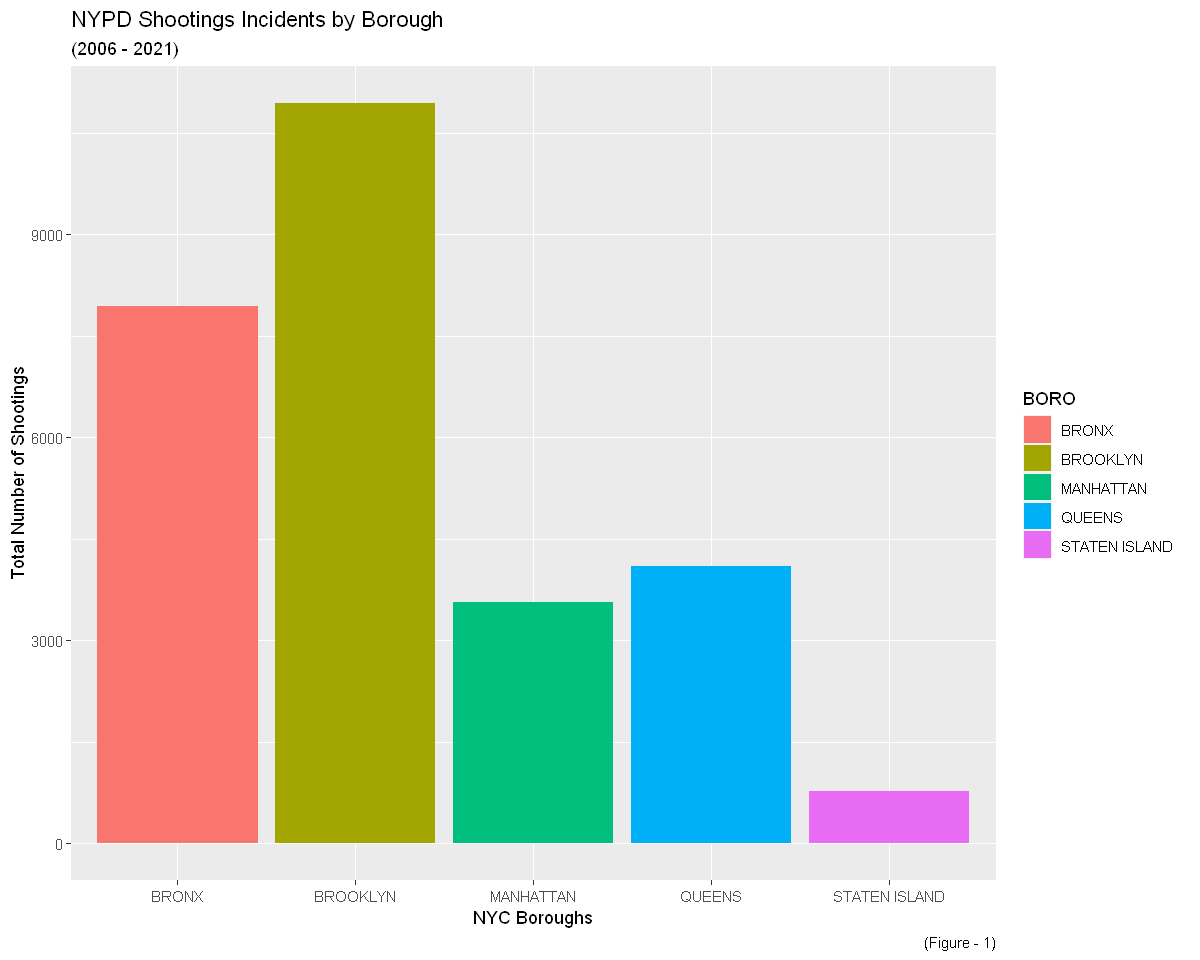

In [11]:
NYPD_clean <- NYPD %>%
    select(c("OCCUR_DATE","OCCUR_TIME","BORO","PRECINCT",
             "STATISTICAL_MURDER_FLAG","PERP_RACE","VIC_AGE_GROUP","VIC_SEX","VIC_RACE")) %>%
    mutate(OCCUR_DATE = mdy(OCCUR_DATE),
           OCCUR_TIME = hms(OCCUR_TIME),
           STATISTICAL_MURDER_FLAG = as.logical(STATISTICAL_MURDER_FLAG),
           Shootings = 1,
           Year = year(OCCUR_DATE))

NYPD_clean %>%
    ggplot(aes(x = BORO, fill = BORO)) +
    geom_bar() +
    labs(title = "NYPD Shootings Incidents by Borough",
         subtitle = "(2006 - 2021)",
         x = "NYC Boroughs",
         y = "Total Number of Shootings",
         caption = "(Figure - 1)")

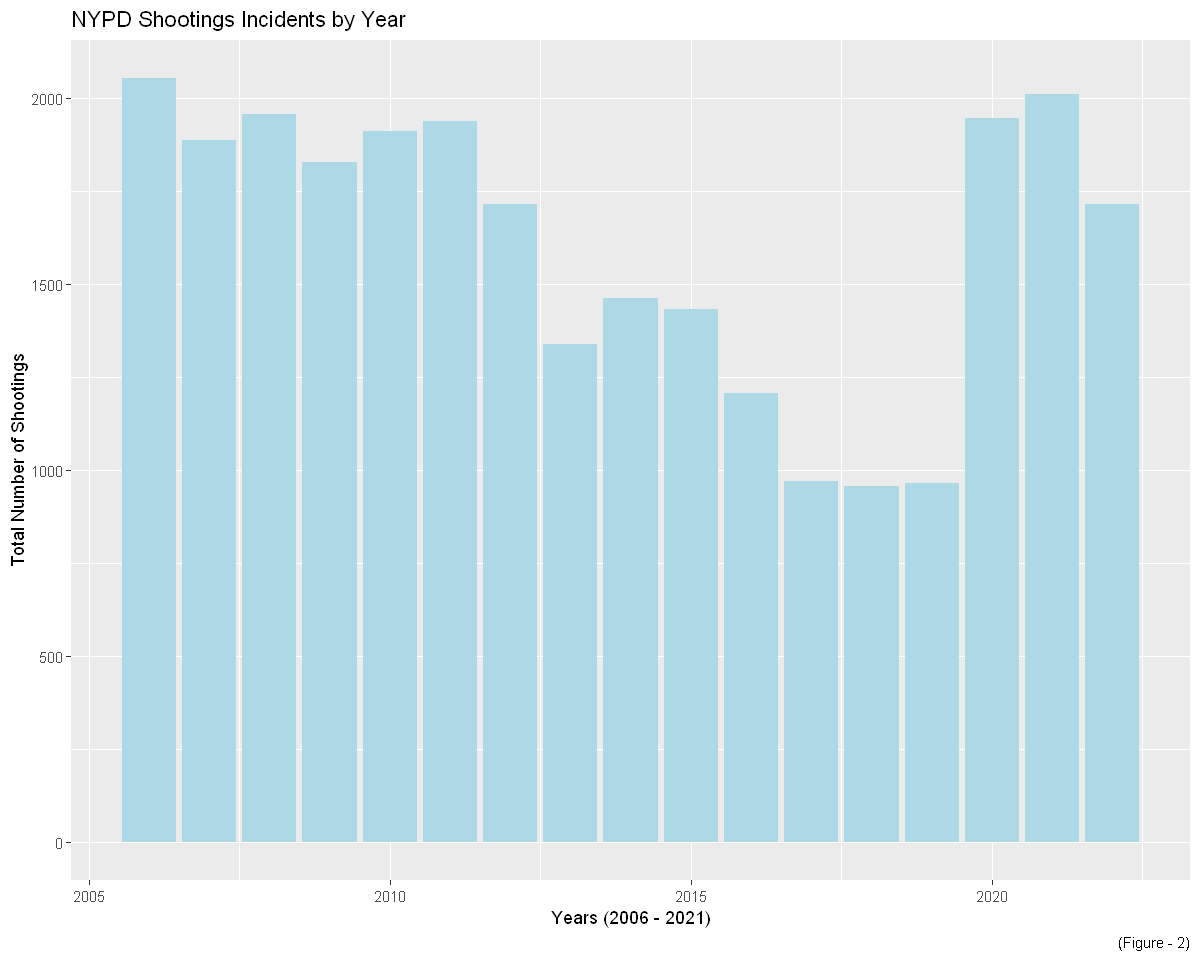

In [12]:
NYPD_clean %>%
    ggplot(aes(x = Year)) +
    geom_bar(fill = "lightblue",show.legend = FALSE) +
    labs(title = "NYPD Shootings Incidents by Year",
         x = "Years (2006 - 2021)",
         y = "Total Number of Shootings",
         caption = "(Figure - 2)")

geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?



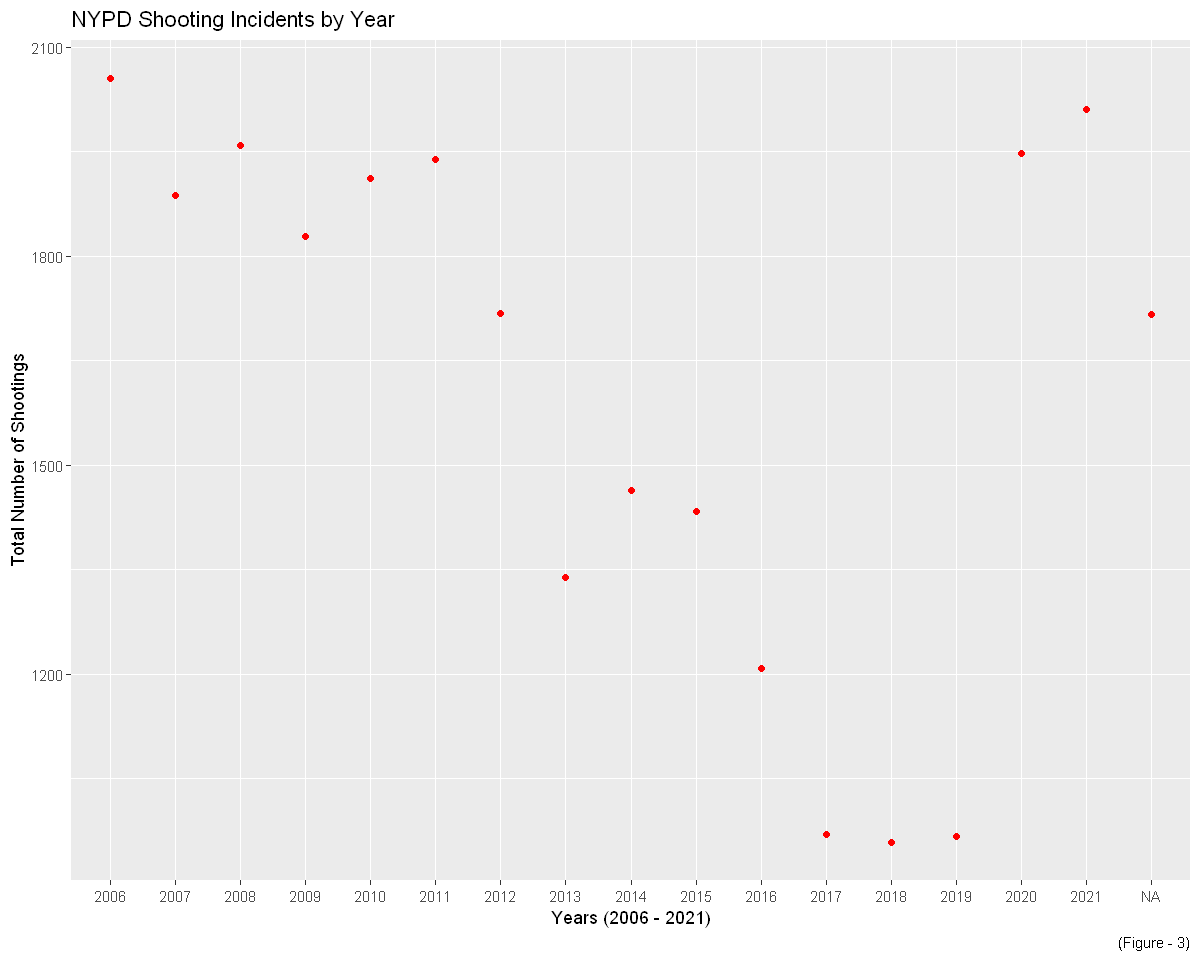

In [13]:
NYPD_year <- NYPD_clean %>%
    group_by(Year) %>%
    summarize(Shootings = sum(Shootings))

NYPD_year %>%
    ggplot(aes(x = as.factor(Year), y = Shootings)) +
    geom_line() +
    geom_point(color = "red") +
    scale_x_discrete(labels = as.character(2006:2021)) +
    labs(
        title = "NYPD Shooting Incidents by Year",
        x = "Years (2006 - 2021)",
        y = "Total Number of Shootings",
        caption = "(Figure - 3)"
    )


looks like some entries are missing dates

In [14]:
NYPD_boro <- NYPD_clean %>%
    group_by(BORO, OCCUR_DATE,Shootings) %>%
    summarize(Shootings = sum(Shootings),
              STATISTICAL_MURDER_FLAG = sum(STATISTICAL_MURDER_FLAG),
              .groups = 'drop') %>%
    select(BORO,OCCUR_DATE,Shootings,STATISTICAL_MURDER_FLAG) %>%
    ungroup()

NYPD_boro_year <- NYPD_clean %>%
    mutate(Year = year(OCCUR_DATE)) %>%
    group_by(BORO, Year, Shootings) %>%
    summarize(Shootings = sum(Shootings),
              STATISTICAL_MURDER_FLAG = sum(STATISTICAL_MURDER_FLAG),
              .groups = 'drop') %>%
    select(BORO, Year,Shootings,STATISTICAL_MURDER_FLAG) %>%
    ungroup()

NYPD_boro_total <- NYPD_boro_year %>%
    group_by(BORO) %>%
    summarize(Shootings = sum(Shootings))
(7402 + 10365)/ sum(NYPD_boro_total$Shootings)

[1] 0.6505199

In [15]:
736/ sum(NYPD_boro_total$Shootings)

[1] 0.02694786

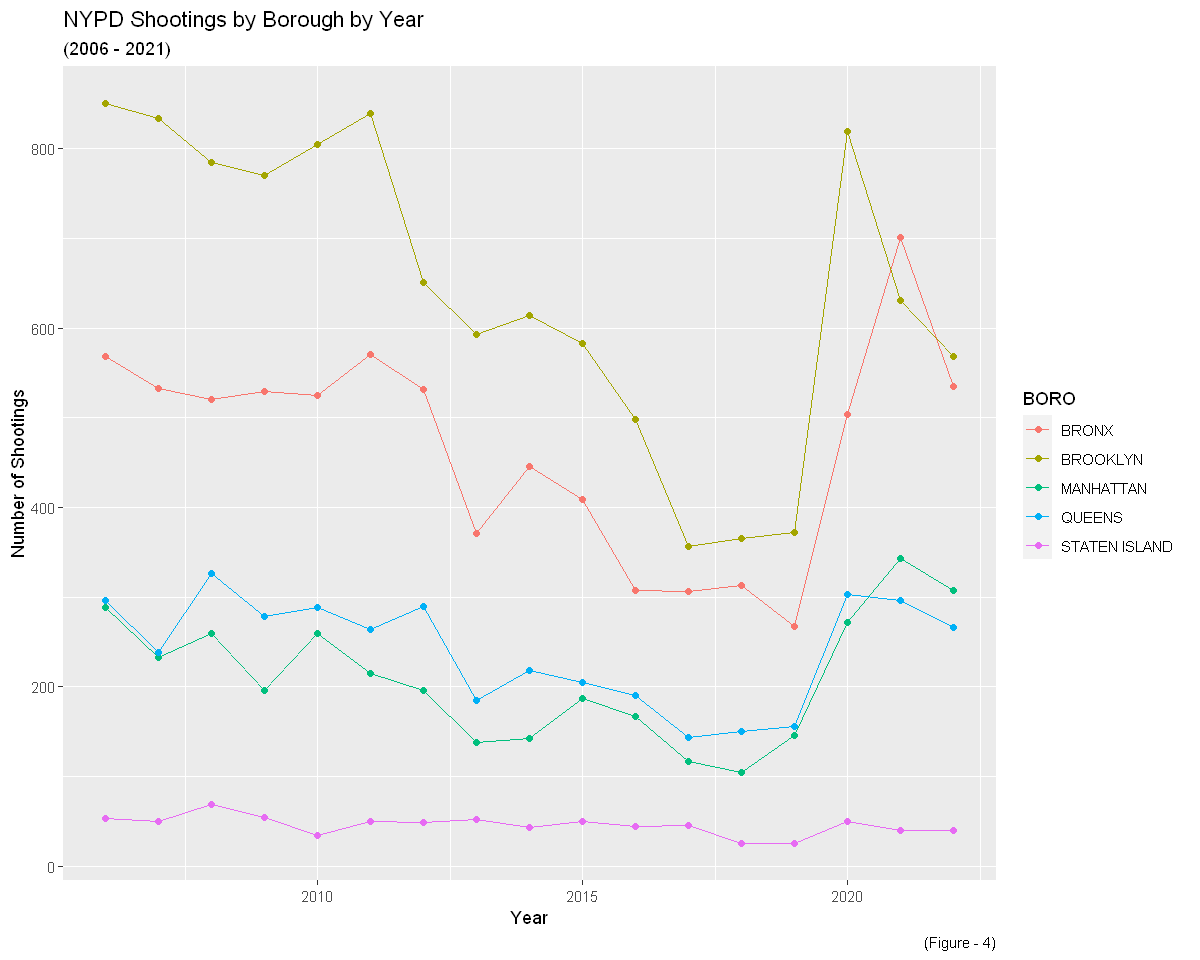

In [16]:
NYPD_boro_year %>%
    ggplot(aes(x = Year, y = Shootings,color = BORO)) +
    geom_line() +
    geom_point() +
    labs(title = "NYPD Shootings by Borough by Year",
         subtitle = "(2006 - 2021)",
         x = "Year",
         y = "Number of Shootings",
         caption = "(Figure - 4)")

It seems like number of population does not affect the number of incident. Bronx and Manhattan has the same magnitude of population, so does Brooklyn and Queens. I would assume that this is because of the presence of gangs and organized crime syndicates which Bronx and Brooklyn has the reputation for. It also worth to note that Bronx is the poorest borough.

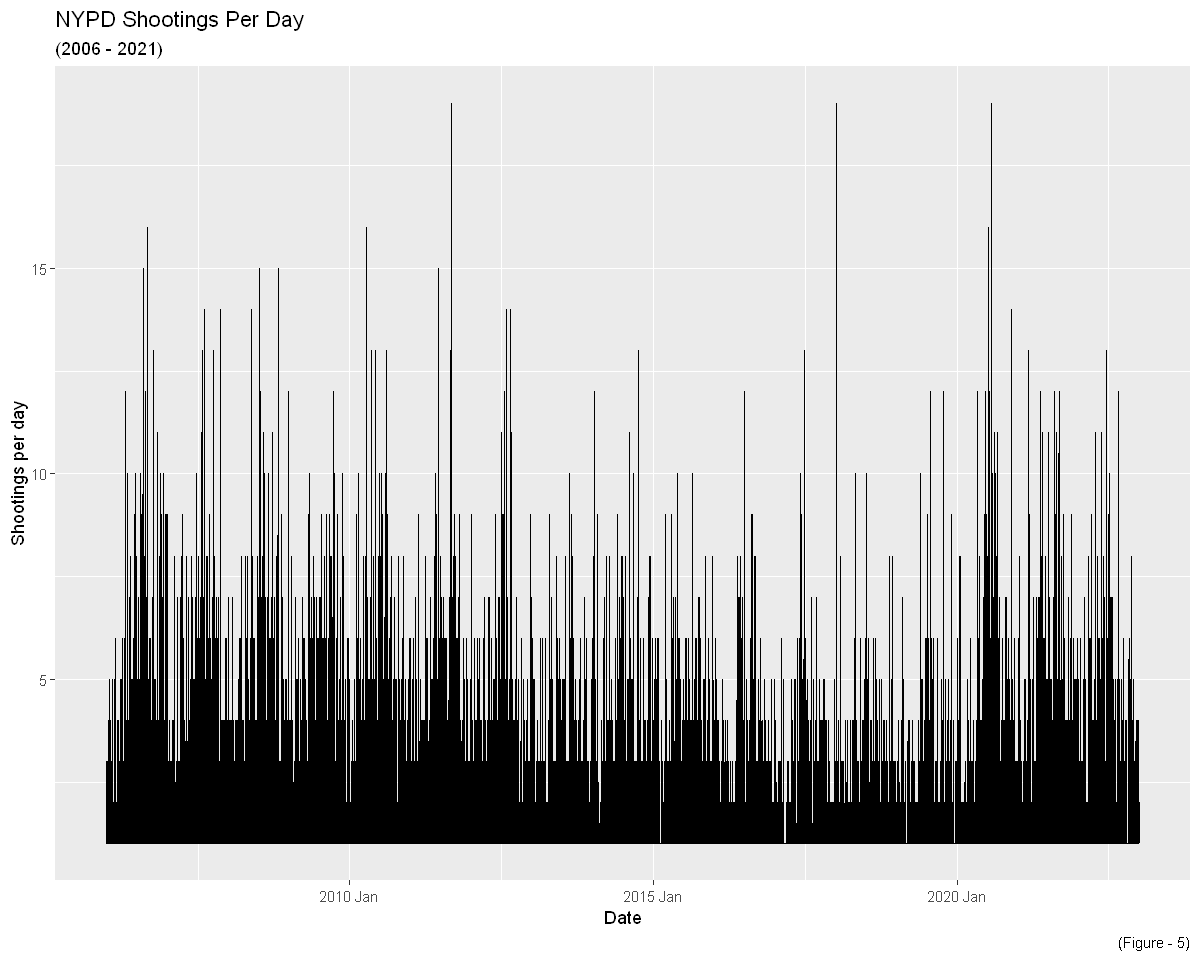

In [17]:
NYPD_boro %>%
    ggplot(aes(x = OCCUR_DATE, y = Shootings)) +
    geom_line() + scale_x_date(date_labels = "%Y %b") +
    labs(title = "NYPD Shootings Per Day",
         subtitle = "(2006 - 2021)",
         x = "Date",
         y = "Shootings per day",
         caption = "(Figure - 5)")

In [18]:
NYPD_time_year <- NYPD_clean %>%
    mutate(Time_year = format(as.Date(OCCUR_DATE), "%m/%d")) %>%
    mutate(Time_year = as.Date(Time_year,"%m/%d")) %>%
    group_by(Time_year,Shootings) %>%
    summarize(Shootings = sum(Shootings),
              STATISTICAL_MURDER_FLAG = sum(STATISTICAL_MURDER_FLAG),
              .groups = 'drop') %>%
    select(Time_year,Shootings,STATISTICAL_MURDER_FLAG) %>%
    ungroup()

NYPD_time_year %>% slice_max(Shootings, n = 2)

Time_year,Shootings,STATISTICAL_MURDER_FLAG
<date>,<dbl>,<int>
2024-07-05,206,33
2024-07-04,158,26


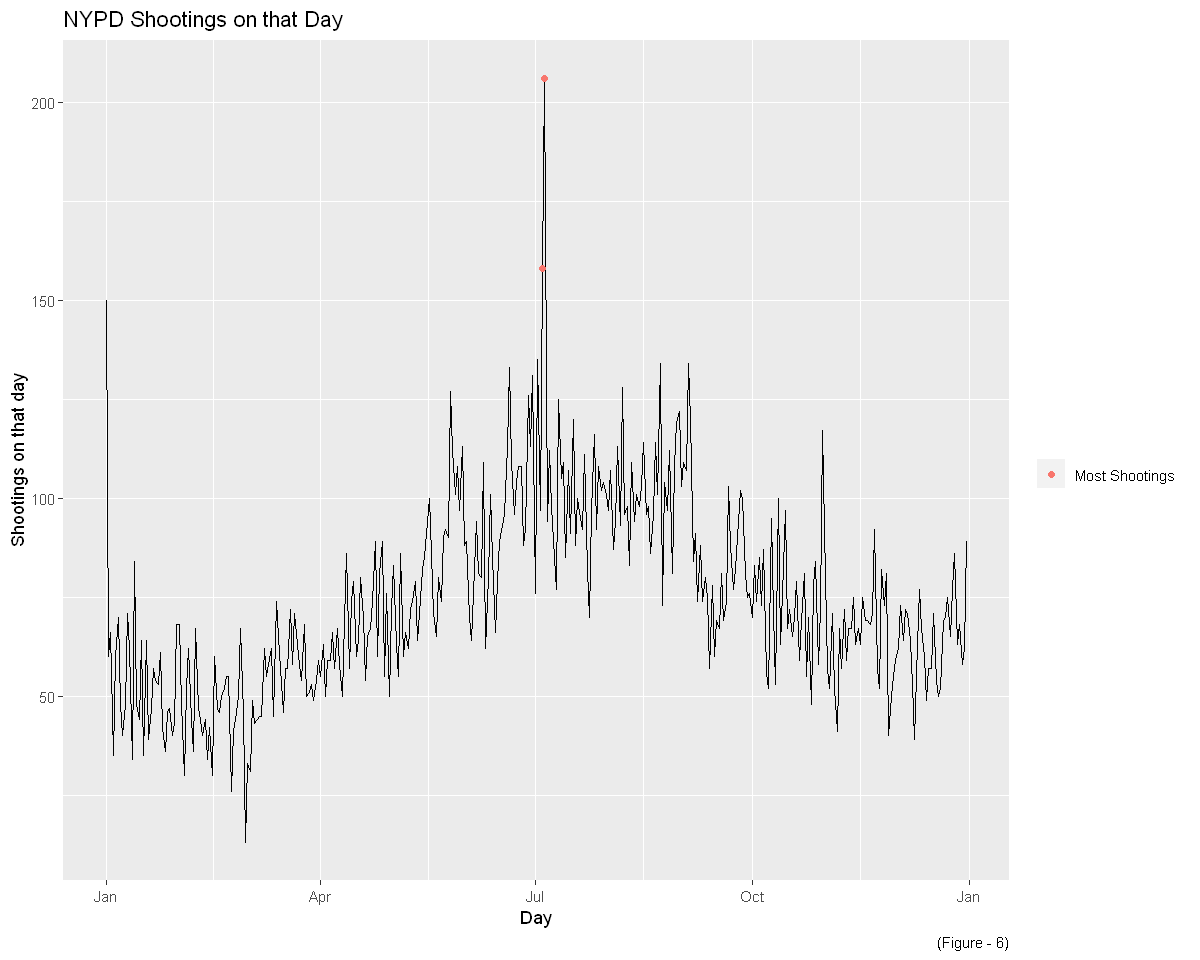

In [19]:
NYPD_July_5 <- NYPD_clean %>%
    mutate(Time_year = format(as.Date(OCCUR_DATE), "%m/%d"),
           Hour = hour(OCCUR_TIME)) %>%
    mutate(Time_year = as.Date(Time_year,"%m/%d")) %>%
    filter(Time_year == "2022-07-05") %>%
    group_by(Hour,Shootings) %>%
    summarize(Shootings = sum(Shootings),
              .groups = 'drop')

NYPD_time_year %>%
    ggplot(aes(x = Time_year, y = Shootings)) +
    geom_line() +
    geom_point(data = NYPD_time_year %>% slice_max(Shootings, n = 2),
               aes(color="Most Shootings")) +
    scale_x_date(date_labels = "%b") +
    labs(title = "NYPD Shootings on that Day",
         subtile = "(2006 - 2021)",
         colour = "",
         x = "Day",
         y = "Shootings on that day",
         caption = "(Figure - 6)")


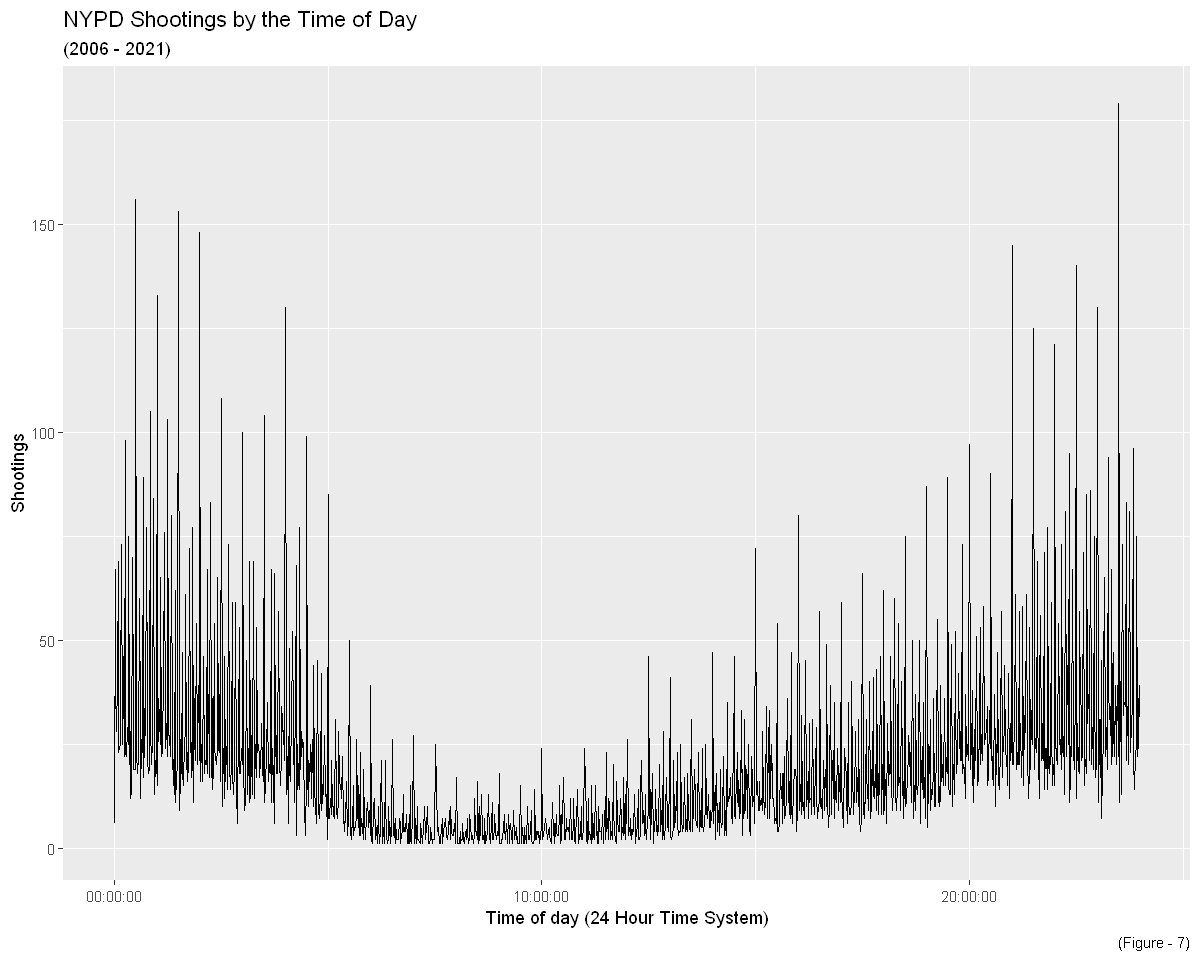

In [20]:
NYPD_time_day <- NYPD_clean %>%
    group_by(OCCUR_TIME,Shootings) %>%
    summarize(Shootings = sum(Shootings),
              STATISTICAL_MURDER_FLAG = sum(STATISTICAL_MURDER_FLAG),
              .groups = 'drop') %>%
    select(OCCUR_TIME,Shootings,STATISTICAL_MURDER_FLAG)

NYPD_time_day %>%
    ggplot(aes(x = OCCUR_TIME, y = Shootings)) +
    geom_line() +
    scale_x_time() +
    labs(title = "NYPD Shootings by the Time of Day",
         subtitle = "(2006 - 2021)",
         x = "Time of day (24 Hour Time System)",
         y = "Shootings",
         caption = "(Figure - 7)")

In [21]:
NYPD_time_hour <- NYPD_clean %>%
  mutate(Hour = hour(OCCUR_TIME)) %>%
  group_by(Hour,Shootings) %>%
  summarize(Shootings = sum(Shootings),
            STATISTICAL_MURDER_FLAG = sum(STATISTICAL_MURDER_FLAG),
            .groups = 'drop') %>%
  mutate(Hour2 = Hour^2) %>%
  select(Hour,Shootings,STATISTICAL_MURDER_FLAG, Hour2)

Warning message:
"Ignoring unknown parameters: linewidth"


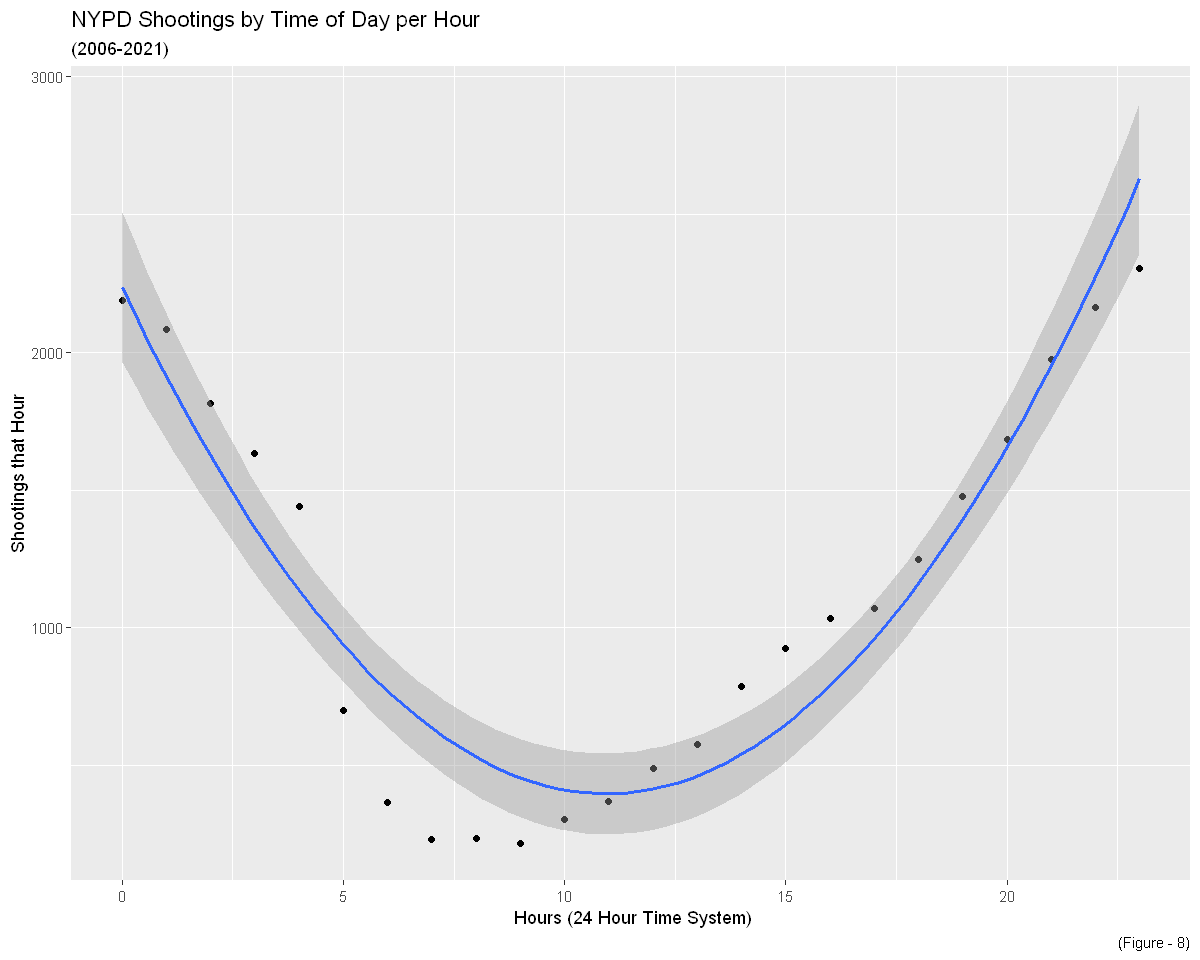

In [22]:
NYPD_time_hour %>%
    ggplot(aes(x = Hour, y = Shootings)) +
    geom_point() +
    stat_smooth(method = "lm", formula = y ~ x + I(x^2), linewidth = 1) +
    labs(title = "NYPD Shootings by Time of Day per Hour",
         subtitle = "(2006-2021)",
         x = " Hours (24 Hour Time System)",
         y = "Shootings that Hour",
         caption = "(Figure - 8)")

It's rather unsurprising that we have more incident at night to the wee hours
# Bias
Are there racial bias? 

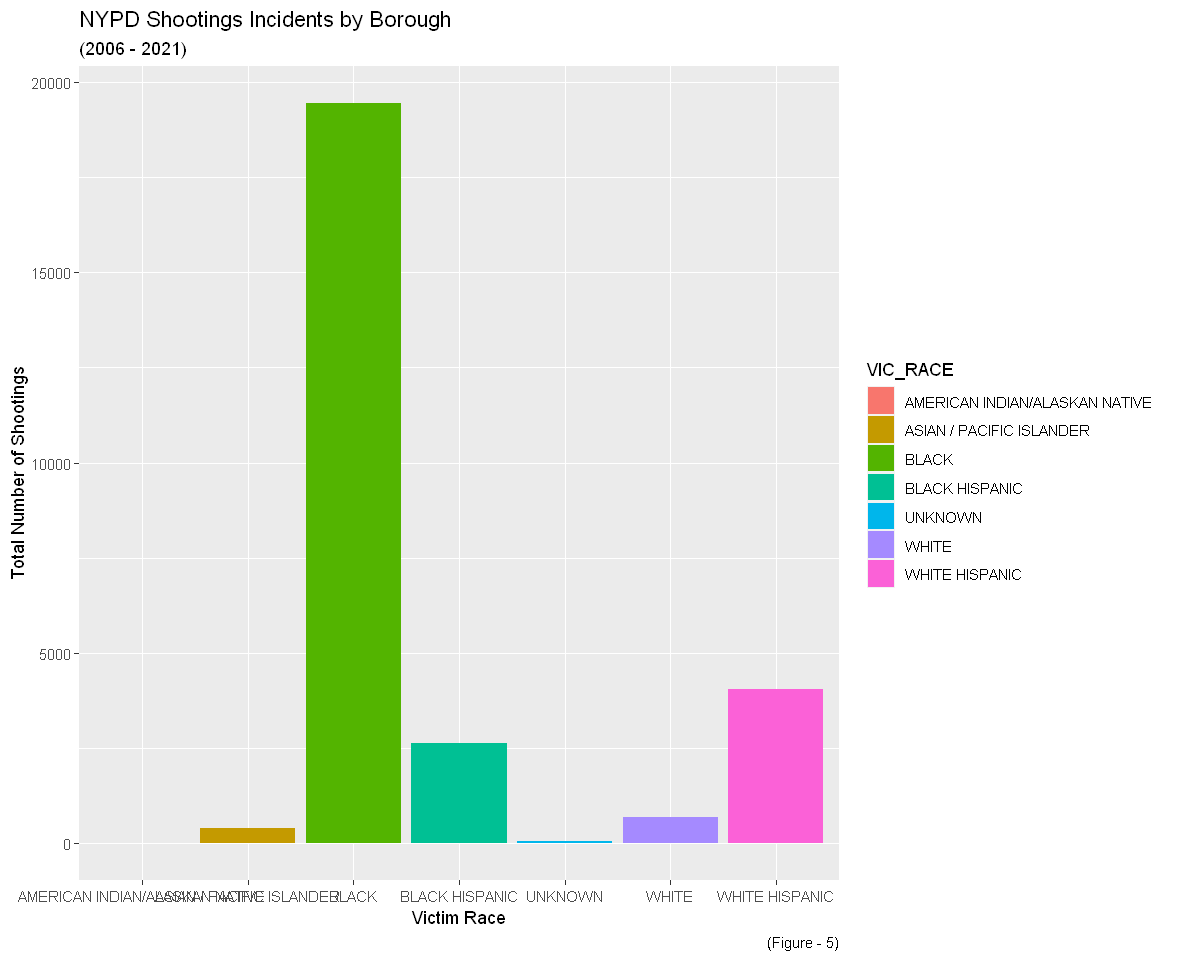

In [23]:
NYPD_clean %>%
    ggplot(aes(x = VIC_RACE, fill = VIC_RACE)) +
    geom_bar() +
    labs(title = "NYPD Shootings Incidents by Borough",
         subtitle = "(2006 - 2021)",
         x = "Victim Race",
         y = "Total Number of Shootings",
         caption = "(Figure - 5)")

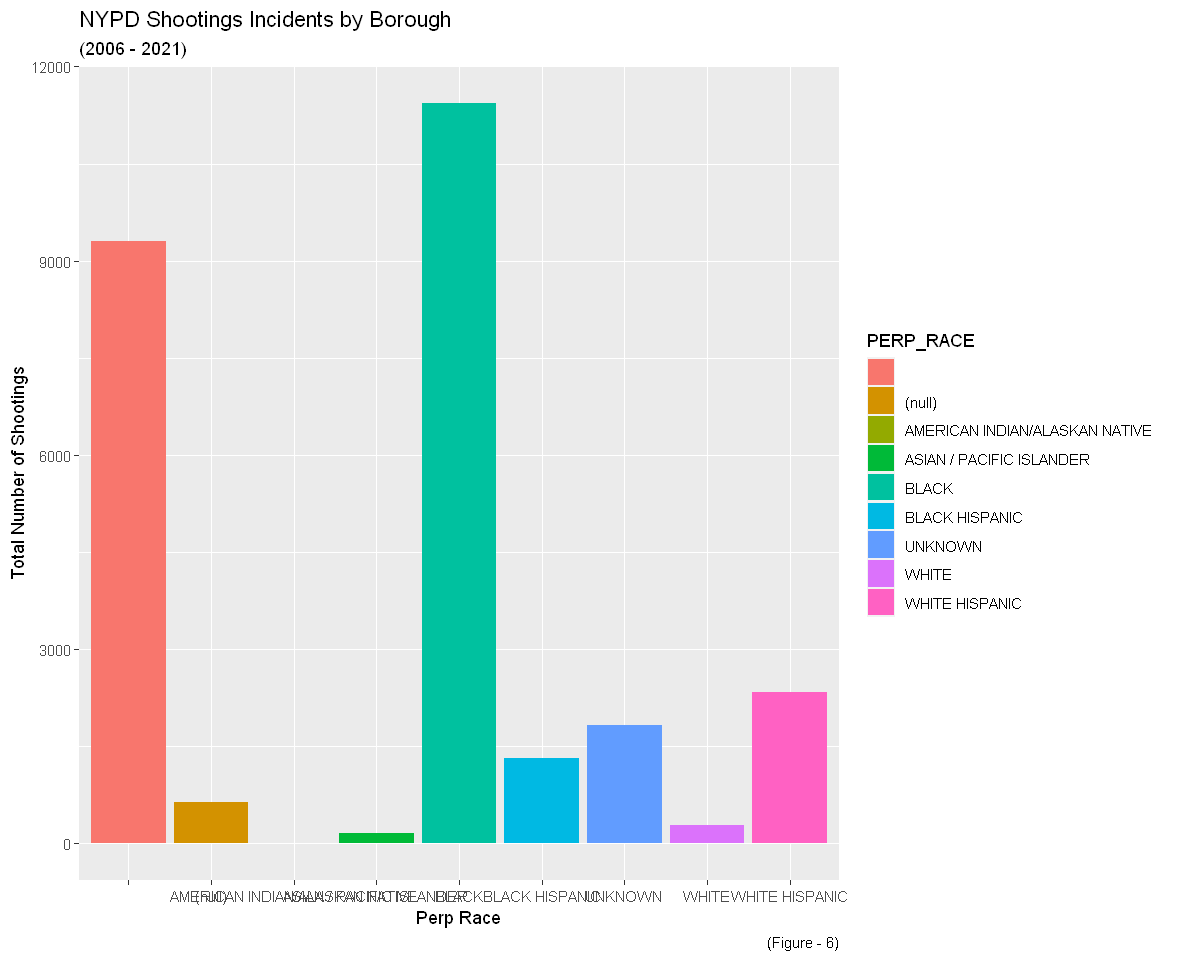

In [24]:
NYPD_clean %>%
    ggplot(aes(x = PERP_RACE, fill = PERP_RACE)) +
    geom_bar() +
    labs(title = "NYPD Shootings Incidents by Borough",
         subtitle = "(2006 - 2021)",
         x = "Perp Race",
         y = "Total Number of Shootings",
         caption = "(Figure - 6)")

It seems like Afro-American made up significant amount of the data which worth more investigation but I shall stop here before stepping into more sensitive topic.